## Notebook Set Up

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import random

RAND_SEED = 49
random.seed(RAND_SEED)

In [ ]:
# specify where you saved these documents
# link =

In [ ]:
# import datasets
header_body_df = pd.read_csv(link + 'header_body_test.csv')
headings_df = pd.read_csv(link + 'headings_test.csv')
header_body_small_df = pd.read_csv(link + 'header_body_test_small.csv')

In [ ]:
# these packages need to be installed
!pip install -r https://raw.githubusercontent.com/mitramir55/PassivePy/main/PassivePyCode/PassivePySrc/requirements_lg.txt
!pip install PassivePy==0.2.2

!pip install language-tool-python
!pip install yake

  Using cached en_core_web_lg-3.4.0-py3-none-any.whl


## Setting up Llama-3

In [ ]:
# install langsmith packages
!pip install -U langchain
!pip install -U langsmith
!pip install langchain-community

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 990.0/990.0 kB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 373.5/373.5 kB 35.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 39.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 6.5 MB/s eta 0:00:00


In [ ]:
# install llama packages
!pip install transformers torch accelerate
import transformers
import torch

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [ ]:
# clear cuda cache
torch.cuda.empty_cache()
torch.cuda.mem_get_info()

(23602266112, 23802544128)

In [ ]:
# log in to hugging face
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) n
Token is valid (permission: read).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [ ]:
# load llama-3 8b
model_id = "meta-llama/Meta-Llama-3-8B-Instruct"

# set model pipeline
pipeline = transformers.pipeline(
    "text-generation",
    model=model_id,
    model_kwargs= {"torch_dtype": torch.bfloat16,
                    "low_cpu_mem_usage": True,},
    device_map="auto",
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/654 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/1.17G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/187 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/51.0k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/73.0 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
## define function to receive llama response
from langsmith import traceable

terminators = [
    pipeline.tokenizer.eos_token_id,
    pipeline.tokenizer.convert_tokens_to_ids("<|eot_id|>")
]

@traceable(run_type="llm") # trace runs of this function with langsmith
def get_llama_response(user_prompt):

# defining system prompt, leave user prompt open
  messages = [
    {"role": "system", "content": "You are an expert in technical writing and document design. You are contracted by a retail bank to check over some of their customer-facing personal banking documents."},
    {"role": "user", "content": user_prompt}
  ]

# chat template
  prompt = pipeline.tokenizer.apply_chat_template(
        messages,
        tokenize=False,
        add_generation_prompt=True)

# define llama parameters
  outputs = pipeline(
    prompt,
    eos_token_id=terminators,
    do_sample=True,
    temperature=0.2,
    top_p=0.9,
    repetition_penalty=1.1,
  )
  response = outputs[0]["generated_text"][len(prompt):] #clean up outputs
  return(response)

## 1. Content: Relevancy

In [ ]:
# define content_df
content_df = header_body_small_df.dropna(subset=['H_relevance'], inplace = False)
content_df.reset_index(drop=True, inplace=True)
content_df.loc[:, ['header', 'body']] = content_df[['header', 'body']].astype(str)

**Validation Function**

In [ ]:
# install necessary packages
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

from gensim.corpora import Dictionary
from gensim.models import LdaModel

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# preprocessing- tokenization, lemmatisation and stopword removal
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    filtered_tokens = [token for token in tokens if token.isalpha() and token not in stop_words]
    return filtered_tokens

In [ ]:
content_check = content_df.copy()

In [ ]:
## topic modelling and similarity scoring
content_check['header_tokens'] = content_check['header'].apply(preprocess_text)
content_check['body_tokens'] = content_check['body'].apply(preprocess_text)

# create dictionary and corpus- use bag of words
dictionary = Dictionary(content_check['body_tokens'])
corpus = [dictionary.doc2bow(tokens) for tokens in content_check['body_tokens']]

# train LDA on body text
num_topics = 1 # there should only be one key topic
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)

# function to extract keywords from LDA topics
def get_lda_keywords(lda_model, num_words=5): # arbitrarily set to 5
    topic_keywords = []
    for i in range(lda_model.num_topics):
        topic_words = lda_model.show_topic(i, topn=num_words)
        keywords = [word for word, _ in topic_words]
        topic_keywords.append(keywords)
    return topic_keywords

body_topic_keywords = get_lda_keywords(lda_model)

# calculate similarity for each row- essentially using jaccard similarity
def calculate_similarity(header_tokens, body_keywords):
    header_set = set(header_tokens)
    common_words = header_set.intersection(body_keywords)
    similarity_score = len(common_words) / len(header_set) if len(header_set) > 0 else 0.0
    return similarity_score

similarities = []
for index, row in content_check.iterrows():
    similarity_score = calculate_similarity(row['header_tokens'], row['body_tokens'])
    similarities.append(similarity_score)

content_check['topic_word_similarity'] = similarities

In [ ]:
# turn to binary scoring with a threshold of over 0
content_check['N_relevance'] = content_check['topic_word_similarity'].apply(lambda x: 0 if x > 0 else 1)

In [ ]:
# copy this to the content_df
content_df.loc[:, 'N_relevance'] = content_check['N_relevance']
content_df.loc[:, 'N_relevance_notes'] = content_check['topic_word_similarity']

In [ ]:
content_df

,bank,header,body,H_relevance,H_keywords,N_keywords_notes,N_keywords,N_relevance,N_relevance_notes,L_relevance_notes,L_relevance
0,natwest_l,What we ask of you,• We ask you to think carefully about whether ...,0.0,1.0,NaN,NaN,0.0,1.000000,NaN,NaN
1,natwest_l,Please let us know if,"• Your contact details change, so we can keep ...",0.0,1.0,NaN,NaN,1.0,0.000000,NaN,NaN
2,santander_a,1. Maintaining the account,There are no monthly fees for maintaining thes...,0.0,0.0,NaN,NaN,0.0,1.000000,NaN,NaN
3,santander_a,1.1 Your Top-Up card,You will be issued a cash card which will be s...,1.0,0.0,NaN,NaN,0.0,1.000000,NaN,NaN
4,santander_a,1.2 Your Cash Card,You will receive a Top-Up card which you can u...,1.0,0.0,NaN,NaN,0.0,1.000000,NaN,NaN
5,santander_a,2. Monthly funding reqs,You are not required to pay money into your ac...,0.0,0.0,NaN,NaN,1.0,0.000000,NaN,NaN
6,santander_a,3. Interest rates,We do not pay interest on these accounts.,0.0,0.0,NaN,NaN,0.0,0.500000,NaN,NaN
7,santander_a,4. Overdraft,Our overdraft services are not available on th...,0.0,0.0,NaN,NaN,0.0,1.000000,NaN,NaN
8,santander_a,5. Transactions,All transactions will be completed in pounds. ...,0.0,0.0,NaN,NaN,0.0,1.000000,NaN,NaN
9,santander_a,Account alerts,You will be automatically set up to receive an...,0.0,1.0,NaN,NaN,0.0,1.000000,NaN,NaN


**LLM Prompting**

In [ ]:
# examples for the prompt
example_yes = """Header: How much can you borrow?
Body: The total amount you can borrow on your card is called the credit limit. You can only borrow up to your credit limit - no more. We’ll tell you your credit limit once we’ve opened your account. If we change it later, we’ll tell you before we make the change."""
example_answer_yes = "Yes, the header asks 'how much can [the customer] can borrow', which the body text provides an answer to (up to their credit limit)."

example_no = """Header: 6.2 Cashback amount and categories
Body: If you apply for a personal loan we will conduct a credit check on you. It’s very important to provide accurate information in your application – we might decline your application based on the results of your credit check, or if you have provided false information."""
example_answer_no = "No, the header introduces 'cashback amount and categories' while the body paragraph is focused on an unrelated topic of credit checks for personal loans."

In [ ]:
# iterate over rows and prompt one-by-one

responses = []

for index, row in content_df.iterrows():
    prompt = f"""Given this pair of header and body text, can you check if the heading matches the body text? Because this is an excerpt from a larger document, please use logic to make inferences where necessary. Don't evaluate the heading on anything else.
    Answer in Yes/ No format with a short justification. Here are two examples to help you:

    \nContext: {example_yes}
    Answer: {example_answer_yes}

    \nContext: {example_no}
    Answer: {example_answer_no}

    \nNow, please evaluate this heading-body pair:
    Header: {row['header']}
    Body: {row['body']}"""

    response = get_llama_response(prompt)

    # validate output
    answer_start = response.lower().find('answer:')
    if answer_start != -1:
        answer_text = response[answer_start + len('answer:'):].strip()
        try: # error handling
            if answer_text.lower().startswith('no') and content_df['N_relevance'].iloc[index] == 0:
              # Prompt the LLM to retry
              retry_prompt = f"""There is a chance your previous response may have been incorrect. Please check again.
              This time consider how the connection between the body and header may be more implicit than explicit.
              Does the heading match the body text in this heading-body pair:
              Header: {row['header']}
              Body: {row['body']}
              \nAnswer in Yes/ No format with a short justification. Don't evaluate the heading on anything else."""

              response = get_llama_response(retry_prompt)
        except Exception as e:
            print(f"Error processing row {index}: {e}")
            continue

    responses.append(response)

Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for

In [ ]:
# create a new column in the original dataframe with the responses
content_df.loc[:, 'L_relevance_notes'] = responses
content_df.head()

,bank,header,body,H_relevance,H_keywords,N_keywords_notes,N_keywords,N_relevance,N_relevance_notes,L_relevance_notes,L_relevance
0,natwest_l,What we ask of you,• We ask you to think carefully about whether ...,0.0,1.0,NaN,NaN,0.0,1.0,"No.\n\nThe heading ""What we ask of you"" sugges...",NaN
1,natwest_l,Please let us know if,"• Your contact details change, so we can keep ...",0.0,1.0,NaN,NaN,1.0,0.0,"Answer: No\n\nJustification: The header ""Pleas...",NaN
2,santander_a,1. Maintaining the account,There are no monthly fees for maintaining thes...,0.0,0.0,NaN,NaN,0.0,1.0,"No.\n\nThe heading ""Maintaining the account"" d...",NaN
3,santander_a,1.1 Your Top-Up card,You will be issued a cash card which will be s...,1.0,0.0,NaN,NaN,0.0,1.0,"No\n\nThe heading ""1.1 Your Top-Up card"" does ...",NaN
4,santander_a,1.2 Your Cash Card,You will receive a Top-Up card which you can u...,1.0,0.0,NaN,NaN,0.0,1.0,"Yes.\n\nThe heading ""1.2 Your Cash Card"" match...",NaN


In [ ]:
# turns results into binary 1 or 0 labels
def label_relevance(text):
  text = text.lower()
  if text.startswith('answer: yes') or text.startswith('yes'):
    return 0
  elif text.startswith('no') or text.startswith('answer: no'):
    return 1
  else:
    return None # handle cases that don't start with yes or no

content_df['L_relevance'] = content_df['L_relevance_notes'].apply(label_relevance)

## 2. Content: Keywords

In [ ]:
# we need the title that was previously dropped temporarily, we also need to split the documents
bank_names = ['natwest_l', 'barclays_c', 'natwest_c', 'santander_a', 'santander_f', 'hsbc_c', 'lloyds_c']

for bank in bank_names:
  globals() [f"{bank}_keywords"] = header_body_df[header_body_df['bank'] == bank][['header', 'body']]
  globals()[f"{bank}_keywords"].reset_index(drop=True, inplace=True)
  globals()[f"{bank}_keywords"][['header', 'body']] = globals()[f"{bank}_keywords"][['header', 'body']].astype(str)

In [ ]:
# install necessary packages
import yake
import re

In [ ]:
# function to extract keywords from df
def extract_keywords_df(df, window_size, num_keywords):

    # take the entire document
    all_body = ' '.join(df['body'])
    document = ' '.join(preprocess_text(all_body))

    # initialise YAKE keyword extractor
    kw_extractor = yake.KeywordExtractor(lan="en",
                                         n= 1,
                                         windowsSize=window_size,
                                         top=num_keywords)

    # extract keywords
    extracted_keywords = kw_extractor.extract_keywords(document)
    keywords = [keyword for keyword, score in extracted_keywords]

    # words to be excluded that add no additional meaning
    excluded_keywords = ['barclays', 'hsbc', 'santander', 'natwest', 'lloyds', 'customer',
                         'banking', 'personal', 'bank', 'content', 'information', 'financial']

    # remove words that appear in the title
    title_keywords = preprocess_text(df['header'][0])
    excluded_keywords = excluded_keywords + title_keywords

    # keywords to be included- based on list sourced online
    included_keywords = ['aer', 'apr', 'bacs', 'ear', 'ftse', 'balance', 'transfer',
                         'rate', 'draft', 'borrow', 'cheque', 'bounce', 'card',
                         'protect', 'security', 'code', 'rate', 'credit', 'interest',
                         'debit', 'deposit', 'dormant', 'guarantee', 'pay', 'payment', 'repay', 'repayment',
                         'estate', 'fixed', 'online', 'income', 'annual', 'gross', 'hvr', 'inheritance',
                         'theft', 'access', 'save', 'savings', 'internet', 'isa', 'ltv', 'long-term',
                         'short-term', 'portability', 'net', 'charge', 'oeic', 'offset', 'overdraft',
                         'limit', 'extension', 'pension', 'remortgage', 'bond', 'secured',
                         'certificate', 'standing', 'order', 'variable', 'statement', 'term', 'transfer',
                         'track', 'tax', 'tax-free', 'cost', 'international', 'loan', 'business']

    # filter
    keywords_modified = [keyword for keyword in keywords if keyword.lower() not in excluded_keywords]

    matched_keywords_list = []
    matched_keywords_count = []

    # iterate over each heading to find matched keywords
    for heading in df['header']:
        heading_filtered_str = ' '.join(preprocess_text(heading))

        pattern = r'\b(?:{})\b'.format('|'.join(map(re.escape, keywords_modified + included_keywords)))
        matched_keywords = re.findall(pattern, heading_filtered_str)

        # filter out excluded keywords
        matched_keywords = [keyword for keyword in matched_keywords if keyword not in excluded_keywords]

        matched_keywords_list.append(', '.join(matched_keywords) if matched_keywords else '')
        matched_keywords_count.append(0 if matched_keywords else 1)

    # Add matched keywords as a new column in the DataFrame
    df['N_keywords_notes'] = matched_keywords_list
    df['N_keywords'] = matched_keywords_count

    return df

In [ ]:
for bank in bank_names:
  extract_keywords_df(globals().get(f"{bank}_keywords"), 1, 100) # use same parameters as training

In [ ]:
# combine
df_list = [natwest_l_keywords, barclays_c_keywords, natwest_c_keywords, santander_a_keywords, santander_f_keywords, hsbc_c_keywords, lloyds_c_keywords]
keywords_df = pd.concat(df_list, ignore_index = True)

In [ ]:
keywords_df

,header,body,N_keywords_notes,N_keywords
0,Our lending commitments and what we ask of you,nan,,1
1,What we ask of you,• We ask you to think carefully about whether ...,,1
2,Please let us know if,"• Your contact details change, so we can keep ...",,1
3,Data Privacy Notice,nan,,1
4,Introduction,We are committed to protecting the information...,,1
...,...,...,...,...
128,Keeping track of your spending,The advice is the same if you have diarrhoea a...,track,0
129,Money worries,"stay at home and get plenty of rest, drink lot...",money,0
130,Free independent\nmoney advice,do not have fruit juice or fizzy drinks – they...,"money, advice",0
131,How long diarrhoea and vomiting last,We know that in life things can change.\nWheth...,"diarrhoea, vomiting",0


In [ ]:
# merge content dfs
merged = keywords_df.merge(content_df, on = 'header', how = 'left')
merged.head()

,header,body_x,N_keywords_notes_x,N_keywords_x,bank,body_y,H_relevance,H_keywords,N_keywords_notes_y,N_keywords_y,N_relevance,N_relevance_notes,L_relevance_notes,L_relevance
0,Our lending commitments and what we ask of you,nan,,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,What we ask of you,• We ask you to think carefully about whether ...,,1,natwest_l,• We ask you to think carefully about whether ...,0.0,1.0,NaN,NaN,0.0,1.0,"No.\n\nThe heading ""What we ask of you"" sugges...",1.0
2,Please let us know if,"• Your contact details change, so we can keep ...",,1,natwest_l,"• Your contact details change, so we can keep ...",0.0,1.0,NaN,NaN,1.0,0.0,"Answer: No\n\nJustification: The header ""Pleas...",1.0
3,Data Privacy Notice,nan,,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Introduction,We are committed to protecting the information...,,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
merged.to_csv('header_body_test.csv', index=False)

## 3. Language: Length

In [ ]:
## clean up heading by removing list identifications
import re

def remove_patterns(df):
    pattern = r'^\d+\. |\d+\) |\(\w\) |\b[A-Z]\b |\b[A-Z]\d+ |\b\d+\b '
    df['header'] = df['header'].apply(lambda x: re.sub(pattern, '', x))
    return df

In [ ]:
## function to count words in heading
def header_count_df(df):

    wordcount = []
    wordcount_check = []

    for heading in df['header']:
      # set headers that are called contents or accessibility to okay by default
      if heading == 'Contents' or heading == 'Accessibility':
        wordcount.append(0)
        wordcount_check.append(0)
      else:
        num_words = len(heading.split())
        wordcount.append(num_words)
        wordcount_check.append(0 if (num_words >= 3 and num_words <= 14) else 1)

    df['N_length_notes'] = wordcount
    df['N_length'] = wordcount_check

    return df

In [ ]:
# execute on df
header_count_df(headings_df)

## 4. Language: Grammar

**Validation Function**

In [ ]:
# split headings dataframe
bank_names = ['natwest_l', 'barclays_c', 'natwest_c', 'santander_a', 'santander_f', 'hsbc_c', 'lloyds_c']

for bank in bank_names:
  globals() [f"{bank}_headings"] = headings_df[headings_df['bank'] == bank]
  globals() [f"{bank}_headings"].dropna(subset = ['H_length'], inplace = True)
  globals()[f"{bank}_headings"].reset_index(drop=True, inplace=True)
  globals()[f"{bank}_headings"]['header'] = globals()[f"{bank}_headings"]['header'].astype(str)

<ipython-input-8-11c41e95a822>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  globals() [f"{bank}_headings"].dropna(subset = ['H_length'], inplace = True)
<ipython-input-8-11c41e95a822>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  globals()[f"{bank}_headings"]['header'] = globals()[f"{bank}_headings"]['header'].astype(str)
<ipython-input-8-11c41e95a822>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

In [ ]:
# install packages
import language_tool_python

In [ ]:
# define function to check grammar using the tool
def check_grammar(df):
  tool = language_tool_python.LanguageTool('en-UK')

  grammar_errors = []
  grammar_check = []

  for heading in df['header']:
    matches = tool.check(heading)
    if len(matches) > 0:
      error_ids = [match.ruleId for match in matches]
      grammar_errors.append(error_ids)
      grammar_check.append(1)
    else:
      grammar_errors.append([])
      grammar_check.append(0)

  df['N_grammar_notes'] = grammar_errors
  df['N_grammar'] = grammar_check

  return df

**LLM Prompting**

In [ ]:
# run base prompt for all

responses = []

for bank in bank_names:
  headings = globals().get(f"{bank}_headings")['header']

  grammar_prompt = f"""Please look through some headers and check for grammatical errors.
  Only check for grammatical correctness and nothing else (e.g. do not evaluate how good of a header it is).
  Some things to look out for include incorrect punctuation, subject/ verb agreements, comma usage, homophones, spelling and capitalisation.
  Please provide a bulleted list of the errors and the headings and index number they are found in.
  Here are two example outputs to help you:
  * Header 1: 'Account benefits at glance' - The noun phrase glance seems to be missing a determiner. Consider adding the article 'a'.
  * Header 5: 'Things you need to know about our serveces' - The word 'services' is misspelt.

  \nNow please check these headers: {headings}"""

  response = get_llama_response(grammar_prompt)
  responses.append(response)

Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


In [ ]:
## first document
print(responses[0])

indices = natwest_l_headings.index[natwest_l_headings['N_grammar'] == 1].tolist()
print("Errors found from Package:", indices)

Here's the list of errors I found:

* Header 0: 'What we ask of you' - The sentence structure is a bit informal; consider rephrasing to make it more formal, e.g., "Information We Require from You"
* No grammatical errors found.

Note that there is no error in the provided text, as it only contains the header numbers and names without any actual header content. If you'd like me to review the actual header content, please provide it, and I'll be happy to assist!
Errors found from Package: []


In [ ]:
non_grammar = ["What we ask of you"]
non_grammar = pd.DataFrame(non_grammar)

In [ ]:
## second document
print(responses[1])

indices = barclays_c_headings.index[barclays_c_headings['N_grammar'] == 1].tolist()
print("Errors found from Package:", indices)

Here is the list of grammatical errors I found:

* Header 1: 'Introduction' - Missing article "the" before "Introduction". Consider changing to "This introduction".
* Header 2: 'Information we hold about you' - Subject-verb agreement error. Should be "The information we hold about you".
* Header 3: 'Sensitive personal data' - No issues found.
* Header 4: 'Who we will share your information with' - No issues found.
* Header 5: 'Insurance and subscriptions' - No issues found.
* Header 6: 'Sharing information about you with tax authori...' - Typo: "authori" should be "authorities".
* Header 7: 'Credit reference agencies and fraud prevention...' - No issues found.
* Header 8: 'Sharing information abroad' - No issues found.
* Header 9: 'Keeping your information' - No issues found.
* Header 10: 'Your rights' - No issues found.
* Header 11: 'Automated processing' - No issues found.
* Header 12: 'How automated processing makes decisions' - No issues found.
* Header 13: 'Credit and affordabilit

In [ ]:
non_index = [0, 1, 5, 14]
non_grammar_2 = barclays_c_headings.loc[non_index, 'header']
non_grammar = pd.concat([non_grammar, non_grammar_2])

In [ ]:
## third document
print(responses[2])

indices = natwest_c_headings.index[natwest_c_headings['N_grammar'] == 1].tolist()
print("Errors found from Package:", indices)

Here is the list of grammatical errors I found:

* Header 0: 'Credit Limit and Advance Limit' - The phrase "at glance" from your example output is missing, but this header doesn't seem to have any issues with grammar.
* Header 1: '1 Credit Limit and Advance Limit' - This header has a number that should probably be part of the main text, not the header title.
* Header 2: 'APR and Total Amount Payable' - No grammatical errors found.
* Header 3: 'Interest rates' - No grammatical errors found.
* Header 4: 'Your right to cancel' - No grammatical errors found.
* Header 5: 'Warning – missing payments' - No grammatical errors found.
* Header 6: 'General Conditions' - No grammatical errors found.
* Header 7: 'Cards' - No grammatical errors found.
* Header 8: 'Card transactions' - No grammatical errors found.
* Header 9: 'Statements' - No grammatical errors found.
* Header 10: 'Charges and tax' - No grammatical errors found.
* Header 11: 'Calculation of interest' - No grammatical errors found.
*

In [ ]:
non_index = [0, 14, 17, 19, 24]
non_grammar_2 = natwest_c_headings.loc[non_index, 'header']
non_grammar = pd.concat([non_grammar, non_grammar_2])

In [ ]:
## fourth document
print(responses[3])

indices = santander_a_headings.index[santander_a_headings['N_grammar'] == 1].tolist()
print("Errors found from Package:", indices)

Here is the list of grammatical errors I found:

* Header 2: 'Maintaining the account' - The phrase "the account" should be preceded by an article ("a" or "an") to make it clear which account is being referred to.
* Header 4: 'Monthly funding reqs' - The abbreviation "reqs" is likely intended to mean "requirements", but it's not grammatically correct. It would be better to write "Monthly funding requirements".
* Header 5: No error found.
* Header 7: 'Transactions' - This heading is a single word, but it might be more descriptive to add a few words, such as "Transaction details and limits".
* Header 9: 'Account alerts' - Similar to Header 7, this heading could be made more descriptive by adding a few words, such as "Setting up and managing account alerts".
* Header 10: 'Account closure' - This heading is a single word, but it might be more informative to add a few words, such as "Closing your account: what you need to know".
* Header 11: 'Changes to Specific Conditions' - The phrase "Sp

In [ ]:
non_index = [1, 4, 7, 9, 10, 11, 14, 15, 21, 23, 28, 29]
non_grammar_2 = santander_a_headings.loc[non_index, 'header']
non_grammar = pd.concat([non_grammar, non_grammar_2])

In [ ]:
non_grammar

,0
0,What we ask of you
0,Introduction
1,Information we hold about you
5,Insurance and subscriptions
14,Regulatory assessments
0,1 Credit Limit and Advance Limit
14,8 Ending or restricting use of a card or accou...
17,11 Disclosure of information and transferring ...
19,"13 Governing law, regulatory information and o..."
24,(c) Missing an Instalment Plan repayment


In [ ]:
# first reprompting
grammar_prompt = f"""There is a chance you may have incorrectly identified some grammatical errors.
Please look through these headers again and check for grammatical errors: {non_grammar}
\nRemember to only check for grammatical correctness and nothing else (e.g. do not evaluate how good of a header it is).
Some things to look out for include incorrect punctuation, subject/ verb agreements, comma usage, homophones, spelling and capitalisation.
Note that these are headers and not necessarily full sentences, so offer some leniency for things that are generally considered acceptable but may not be completely accurate."""

response = get_llama_response(grammar_prompt)
print(response)

Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


After reviewing the headers, I found the following potential grammatical errors:

* "What we ask of you" should likely start with a capital letter ("What We Ask of You") since it's a title.
* "Introduction" is fine as it is, being a single word that doesn't require capitalization.
* "Credit Limit and Advance Limit" seems to be missing an article ("a" or "the"). It could be rephrased to "Your Credit Limit and Advance Limit".
* "Disclosure of information and transferring..." appears to be missing a verb. It could be rephrased to "Disclosure of Information and Transferring..." or "Disclosure of Information and Transfer of...".
* "Maintaining the account" should likely start with a capital letter ("Maintaining the Account").
* "Monthly funding reqs" is likely intended to be "Monthly Funding Requirements", which would improve clarity and grammar.
* "Transactions" is fine as it is, being a single word that doesn't require capitalization.
* "Account alerts" should likely start with a capital 

In [ ]:
## fifth document
print(responses[4])

indices = santander_f_headings.index[santander_f_headings['N_grammar'] == 1].tolist()
print("Errors found from Package:", indices)

Here is the list of grammatical errors I found:

* Header 0: 'Financial Services Compensation Scheme (FSCS)...' - The sentence appears to be incomplete; consider adding a verb or rephrasing for clarity.
* Header 1: 'Basic information about the protection of your...' - The possessive pronoun "your" should likely be followed by a noun (e.g., "account", "funds") to form a complete phrase.
* Header 3: 'Scheme responsible for the protection of your...' - The phrase "for the protection of your..." seems to be a dependent clause without a main clause; consider rephrasing for clarity.
* Header 5: None found (no errors)

Note that I did not find any errors related to punctuation, comma usage, homophones, or spelling beyond the one mentioned in the example output ("serveces").
Errors found from Package: []


In [ ]:
non_index = [0, 1, 3]
non_grammar_2 = santander_f_headings.loc[non_index, 'header']

In [ ]:
## sixth document
print(responses[5])

indices = hsbc_c_headings.index[hsbc_c_headings['N_grammar'] == 1].tolist()
print("Errors found from Package:", indices)

Here is the list of grammatical errors I found:

* Header 0: 'Changes are being made to our terms' - The subject-verb agreement is off; consider using "are" instead of "is" since "terms" is a plural noun.
* Header 1: 'What’s changing' - No errors found.
* Header 2: 'Premier Family Savings Account' - No errors found.
* Header 3: 'What do you need to do?' - No errors found.
* Header 4: 'Changes for specific accounts' - No errors found.
* Header 5: 'HSBC Jade Acount' - The word "Acount" should be spelled as "Account".
* Header 6: 'HSBC Advance Bank Acount' - The word "Acount" should be spelled as "Account".
* Header 7: 'Student Account' - No errors found.
* Header 8: 'Graduate Bank Account' - No errors found.
* Header 9: 'HSBC Currency Account' - No errors found.
* Header 10: 'MyMoney Account (Premier MyAccount, MyAccount,...)' - The parentheses contain multiple items that are not separated by commas or other punctuation marks.
* Header 11: 'Fixed Rate Saver' - No errors found.
* Header 1

In [ ]:
non_index = [0, 5, 6, 10, 13, 14, 17, 20, 21, 22]
non_grammar_3 = hsbc_c_headings.loc[non_index, 'header']
non_grammar_2 = pd.concat([non_grammar_2, non_grammar_3])

In [ ]:
## seventh document
print(responses[6])

indices = lloyds_c_headings.index[lloyds_c_headings['N_grammar'] == 1].tolist()
print("Errors found from Package:", indices)

Here is the list of errors I found:

* Header 0: 'When you need help' - No error found
* Header 1: 'When you need support' - No error found
* Header 2: 'Keeping track of your spending' - No error found
* Header 3: 'Money worries' - No error found
* Header 4: 'Free independent money vice' - Error: "vice" should be spelled as "advice"
* Header 5: 'How long diarrhoea and vomiting last' - Error: "diarrhoea" should be spelled as "diarrhea" (American English) or "diarrhoea" (British English), but since this is a financial institution, American English is more likely; also, consider rephrasing to make it clearer what this section is about
* Header 6: 'Diarrhoea and vomiting can spread easily' - Error: "Diarrhoea" should be spelled as "Diarrhea" (American English) or "Diarrhoea" (British English); also, consider rephrasing to make it clearer what this section is about

Let me know if you'd like me to review anything else!
Errors found from Package: []


In [ ]:
non_index = [4, 5, 6]
non_grammar_3 = lloyds_c_headings.loc[non_index, 'header']
non_grammar_2 = pd.concat([non_grammar_2, non_grammar_3])

In [ ]:
# reprompt extra errors
grammar_prompt = f"""There is a chance you may have incorrectly identified some grammatical errors.
Please look through these headers again and check for grammatical errors: {non_grammar_2}
\nRemember to only check for grammatical correctness and nothing else (e.g. do not evaluate how good of a header it is).
Some things to look out for include incorrect punctuation, subject/ verb agreements, comma usage, homophones, spelling and capitalisation.
Note that these are headers and not necessarily full sentences, so offer some leniency for things that are generally considered acceptable but may not be completely accurate."""

response = get_llama_response(grammar_prompt)
print(response)

Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


After reviewing the headers, I've found the following potential grammatical errors:

* 0: "Financial Services Compensation Scheme (FSCS)..." - This appears to be a proper noun and should be capitalized as such ("Financial Services Compensation Scheme (FSCS)...").
* 1: "Basic information about the protection of your..." - No apparent errors.
* 3: "Scheme responsible for the protection of your..." - Shouldn't this be "The scheme responsible for the protection of your..."? Adding the definite article "the" makes the sentence more natural-sounding.
* 0: "Changes are being made to our terms" - This one looks fine to me!
* 5: "HSBC Jade Acount" - Typo alert! It's "Account", not "Acount".
* 6: "HSBC Advance Bank Acount" - Another typo! It's still "Account", not "Acount".
* 10: "MyMoney Account (Premier MyAccount, MyAccount,...)" - This is a list of items, so it's okay that it's not a complete sentence. However, if you want to make it a sentence, you could rephrase it to something like "MyMone

In [ ]:
not_grammar = hsbc_c_headings['header'][8]

In [ ]:
# if we notice some missed errors
grammar_prompt = f"""There is a chance you may have missed some grammatical errors.
Please look through this header again and check for grammatical errors: {not_grammar}
\nSome things to look out for include incorrect punctuation, subject/ verb agreements, comma usage, homophones, spelling and capitalisation."""

response = get_llama_response(grammar_prompt)
print(response)

Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


Thank you for the opportunity to review the header.

Upon reviewing the header "Graduate Bank Account", I did not find any glaring grammatical errors. However, I do have a few suggestions to improve clarity and consistency:

* The header is concise and straightforward, but it might be beneficial to add a brief description or tagline to provide more context about what the account offers or benefits. For example: "Graduate Bank Account - Designed for recent graduates, offering competitive rates and rewards."
* Consider adding a subtitle or secondary heading to break up the content and make it easier to scan. This could be something like "Start your financial journey with our Graduate Bank Account" or "Take control of your finances with our tailored graduate banking solution".

As for grammatical errors, here's what I found:

* There are no obvious grammatical errors in the header itself (e.g., incorrect punctuation, subject-verb agreement issues, etc.). The text is well-structured and ea

## 5. Language: Passive

In [ ]:
from PassivePySrc import PassivePy
spacy_model = "en_core_web_lg"
passivepy = PassivePy.PassivePyAnalyzer(spacy_model)

# passive detection function
def passive_detection_df(df):
  df_detected_c = passivepy.match_corpus_level(df, column_name='header', n_process = 1,
                                              batch_size = 32, add_other_columns=True,
                                              truncated_passive=False, full_passive=False)

  df['N_passive'] = df_detected_c['binary']
  df['N_passive_notes'] = df_detected_c['all_passives']
  return df

In [ ]:
passive_detection_df(headings_df)

Detecting Sentences...


  0%|          | 0/167 [00:00<?, ?it/s]

Total number of sentences = 172
Starting to find passives...


  0%|          | 0/172 [00:00<?, ?it/s]

  0%|          | 0/167 [00:00<?, ?it/s]

,bank,level,header,H_length,H_grammar,H_passive,H_subheadings,H_design,N_length_notes,N_length,N_grammar_notes,N_grammar,L_grammar,L_grammar_notes,N_passive,N_passive_notes,L_subheadings,L_design,L_design_notes
0,lloyds_d,0,Ways we use your data,NaN,NaN,NaN,NaN,0,5,0,NaN,NaN,NaN,NaN,0,[],NaN,0.0,NaN
1,lloyds_d,0,These are some of the important ways we use yo...,11.0,0.0,0.0,NaN,0,11,0,[],0.0,0.0,NaN,0,[],NaN,0.0,NaN
2,lloyds_d,1,We look after your personal information,6.0,0.0,0.0,0.0,0,6,0,[],0.0,0.0,Required 2 prompts,0,[],0.0,0.0,NaN
3,lloyds_d,1,We collect your personal information,5.0,0.0,0.0,0.0,0,5,0,[],0.0,0.0,NaN,0,[],1.0,0.0,NaN
4,lloyds_d,1,Who we share your personal information with,7.0,0.0,0.0,0.0,0,7,0,[],0.0,0.0,NaN,0,[],0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,lloyds_c,2,Keeping track of your spending,0.0,0.0,0.0,0.0,1,5,0,NaN,NaN,NaN,NaN,0,[],NaN,NaN,NaN
163,lloyds_c,2,Money worries,1.0,0.0,0.0,0.0,1,2,1,NaN,NaN,NaN,NaN,0,[],NaN,NaN,NaN
164,lloyds_c,2,Free independent money vice,0.0,1.0,0.0,1.0,1,4,0,NaN,NaN,NaN,NaN,0,[],NaN,NaN,NaN
165,lloyds_c,2,How long diarrhoea and vomiting last,0.0,0.0,0.0,1.0,1,6,0,NaN,NaN,NaN,NaN,0,[],NaN,NaN,NaN


In [ ]:
headings_df.to_csv('language.csv')

## 6. Structure: Subheadings



In [ ]:
for bank in bank_names:
  globals()[f"{bank}_headings"]['level'] = globals()[f"{bank}_headings"]['level'].replace({0: 'Main heading:', 1: 'Subheading:', 2: 'Sub-subheading:', 3: "Sub-sub-subheading:"})

<ipython-input-102-2a4c92dabdf7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  globals()[f"{bank}_headings"]['level'] = globals()[f"{bank}_headings"]['level'].replace({0: 'Main heading:', 1: 'Subheading:', 2: 'Sub-subheading:', 3: "Sub-sub-subheading:"})


In [ ]:
# turn df to text
def turn_to_text(df):
  df['combined'] = df['level'] + ' ' + df['header']
  output_string = '\n'.join(df['combined'].astype(str).tolist())
  return output_string

for bank in bank_names:
  globals()[f"{bank}_text"] = turn_to_text(globals()[f"{bank}_headings"])

<ipython-input-103-5f4544c43af0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['combined'] = df['level'] + ' ' + df['header']
<ipython-input-103-5f4544c43af0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['combined'] = df['level'] + ' ' + df['header']
<ipython-input-103-5f4544c43af0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

In [ ]:
# prompt to run
responses = []

for bank in bank_names:
  headings = globals().get(f"{bank}_text")

  structure_prompt = f"""Here is an ordered list of headings from a document along with their classifications: {headings}
  For each subheader and sub-subheader, please answer the following question in Yes/No format with a brief justification if No:
  Is the heading clearly relevant to its corresponding parent heading? Don't grade main headings, just use them for context."""

  response = get_llama_response(structure_prompt)
  responses.append(response)

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


In [ ]:
answers = pd.DataFrame(responses)
answers.to_csv('structure.csv')

## Setting up Llava-Next

In [ ]:
import transformers
import requests
from PIL import Image
import torch
from transformers import AutoProcessor, LlavaNextForConditionalGeneration

In [ ]:
!pip install -q bitsandbytes==0.41.3 accelerate==0.25.0

In [ ]:
# clear cache
torch.cuda.empty_cache()
torch.cuda.mem_get_info()

(23602266112, 23802544128)

In [ ]:
# quantisation configuation
from transformers import LlavaNextForConditionalGeneration, BitsAndBytesConfig

# specify how to quantize the model
quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.float16,
)

In [ ]:
# load the model in half-precision
model = LlavaNextForConditionalGeneration.from_pretrained("llava-hf/llava-v1.6-mistral-7b-hf", quantization_config=quantization_config, device_map="auto")
processor = AutoProcessor.from_pretrained("llava-hf/llava-v1.6-mistral-7b-hf")

config.json:   0%|          | 0.00/1.28k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/70.2k [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/380M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.98k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/41.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/552 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
# define llava response function
from langsmith import traceable

@traceable(run_type="llm")
def get_llava_response(prompt, images):
  inputs = processor(text=prompt, images=images, padding=True, return_tensors="pt").to(model.device)
  generate_ids = model.generate(**inputs, max_new_tokens=1000)
  response = processor.batch_decode(generate_ids, skip_special_tokens=True, clean_up_tokenization_spaces=False)
  print(response[0].split("[/INST]")[1].strip())

In [ ]:
image_url = "/content/drive/My Drive/Dissertation/Notebooks/images/"

## 7. Design

Repeat for all documents

In [ ]:
print(headings) # utilising the same text from subheadings

Main heading: Pre-Contractual explanation
Subheading: What is a 'Personal Loan?'
Subheading: Put Simply
Subheading: What checks do you need to do for me to get a personal loan with Santander
Subheading: Put Simply
Subheading: How much do I have to pay under the agreement
Subheading: Put Simply
Subheading: What are the consequences if I do not keep up with repayments?
Subheading: Put Simply
Subheading: Are there any features of the agreement which may operate in a manner which may adversely affect me?
Subheading: Put Simply
Subheading: Your Right to Cancel (and repay early)
Subheading: Put Simply


In [ ]:
# import images
page_1 = Image.open(image_url + 'santander_l_1.png')
page_2 = Image.open(image_url + 'santander_l_2.png')

In [ ]:
# prompt analysis on design
prompt= [f"""[INST] <image> <image> \n Use these image to detect the formatting of the headers in this document.
Here is the list of headers to look out for and their classifications: {headings}
Determine if the difference in the formatting is enough to distinguish between each heading class clearly. Consider things like font characteristics, colour, spacing, highlighting etc.
For each heading class, provide a 'Yes' or 'No' answer followed by a comma and a brief justification. Use this template:
1. Title -
2. Main headings -
3. Subheadings -
4. Sub-subheadings -
Only provide answers for heading classes that are present in the document. [/INST]""", """[INST] Now determine if the difference in the formatting between the subheadings and the body text is clearly distinguishable.
Answer with a 'Yes' or 'No' followed by a brief justification.[/INST]"""]

response = get_llava_response(prompt, images = [page_1, page_2])
print(response)

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


1. Title -
2. Main headings - Yes, the main heading "Personal Loan" is distinct from the subheadings and sub-subheadings. It is larger, bold, and centrally aligned, making it stand out from the rest of the text.
3. Subheadings - Yes, the subheadings "What is a 'Personal Loan?'" and "Put Simply" are clearly distinguishable from the main heading and sub-subheadings. They are larger than the sub-subheadings and are bold, making them easily identifiable.
4. Sub-subheadings - Yes, the sub-subheadings "What checks do you need to do for me to get a personal loan with Santander" and "What are the consequences if I do not keep up with repayments?" are differentiated from the subheadings by their smaller size and lack of bolding. They are also distinct from the main heading and other subheadings.
5. Sub-sub-subheadings - No, there are no sub-sub-subheadings in this document.
None


## Final Evaluation

In [ ]:
# import updated datasets
link = '/content/drive/My Drive/Dissertation/Notebooks/datasets/'

content = pd.read_csv(link + 'header_body_test.csv')
headings = pd.read_csv(link + 'headings_test.csv') # this dataset was consolidated manually due to the LLM outputs

In [ ]:
import sklearn
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score

In [ ]:
# define function

def get_accuracy(df, human, machine):
  accuracy = accuracy_score(df[human], df[machine])
  precision = precision_score(df[human], df[machine])
  recall = recall_score(df[human], df[machine])
  cm = confusion_matrix(df[human], df[machine])
  f1 = f1_score(df[human], df[machine])

  print("Accuracy:", round(accuracy,4))
  print("Precision:", round(precision,4))
  print("Recall:", round(recall,4))
  print("F1 Score:", round(f1,4))

  labels = sorted(df[human].unique())
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
  disp.plot()
  plt.show()

In [ ]:
relevance = content.dropna(subset = ['L_relevance', 'H_relevance'])

<class 'pandas.core.frame.DataFrame'>
Index: 82 entries, 1 to 169
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bank               82 non-null     object 
 1   header             82 non-null     object 
 2   body               82 non-null     object 
 3   H_relevance        82 non-null     float64
 4   H_keywords         82 non-null     float64
 5   N_keywords_notes   61 non-null     object 
 6   N_keywords         82 non-null     float64
 7   N_relevance        82 non-null     float64
 8   N_relevance_notes  82 non-null     float64
 9   L_relevance_notes  82 non-null     object 
 10  L_relevance        82 non-null     float64
dtypes: float64(6), object(5)
memory usage: 7.7+ KB


Accuracy: 0.6951
Precision: 0.4651
Recall: 0.9091
F1 Score: 0.6154


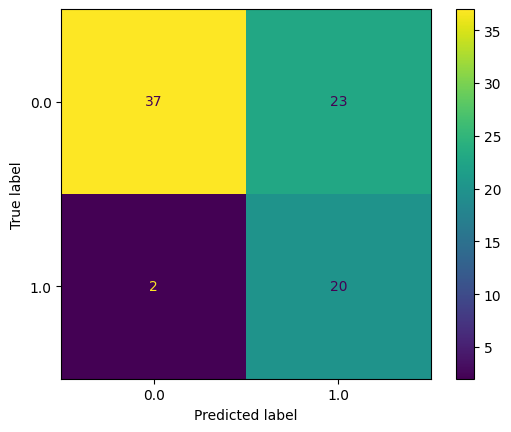

In [ ]:
# measure accuracy for content- relevance
get_accuracy(relevance, 'H_relevance', 'L_relevance')

Accuracy: 0.8659
Precision: 0.7619
Recall: 0.7273
F1 Score: 0.7442


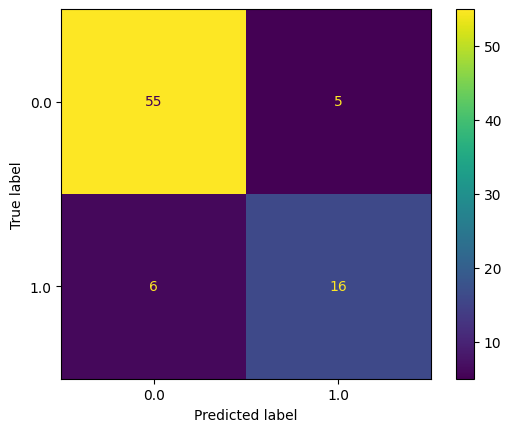

In [ ]:
# measure accuracy for content- relevance
get_accuracy(relevance, 'H_relevance', 'N_relevance')

In [ ]:
# examine the incorrect label
content[content['H_relevance'] != content['L_relevance']][['header', 'body', 'L_relevance_notes']]

,header,body,L_relevance_notes
0,Ways we use your data,NaN,NaN
2,We look after your personal information,To open your account we need to know some thin...,"Yes.\n\nThe heading ""We look after your person..."
6,Personal Loan,NaN,NaN
7,Pre-Contractual explanation,NaN,NaN
10,What checks do you need to do for me to get a ...,"If you wish to apply for a loan then we will,...","No\n\nThe heading asks about ""checks"" needed t..."
...,...,...,...
155,Changes for current accounts,NaN,NaN
160,Club Lloyds Account,NaN,NaN
161,NaN,Welcome to Club Lloyds,NaN
162,NaN,As a Club Lloyds customer\nyou get access to a...,NaN


Accuracy: 0.8352
Precision: 0.6957
Recall: 0.6667
F1 Score: 0.6809


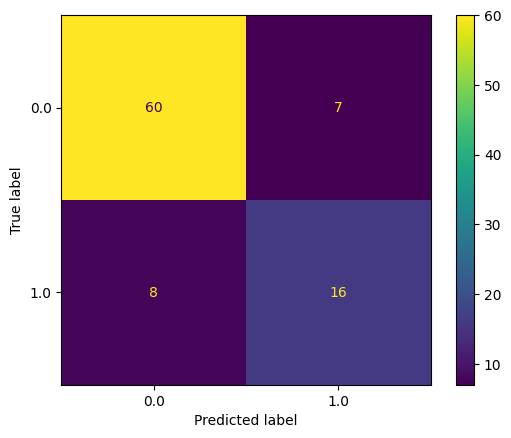

In [ ]:
# measure accuracy for content- keywords
keywords = content.dropna(subset = ['N_keywords', 'H_keywords'])
get_accuracy(keywords, 'H_keywords', 'N_keywords')

In [ ]:
headings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bank             167 non-null    object 
 1   level            167 non-null    int64  
 2   header           167 non-null    object 
 3   H_length         158 non-null    float64
 4   H_grammar        158 non-null    float64
 5   H_passive        158 non-null    float64
 6   H_subheadings    137 non-null    float64
 7   H_design         158 non-null    float64
 8   N_length_notes   158 non-null    float64
 9   N_length         158 non-null    float64
 10  N_grammar_notes  35 non-null     object 
 11  N_grammar        35 non-null     float64
 12  L_grammar        158 non-null    float64
 13  L_grammar_notes  28 non-null     object 
 14  N_passive        159 non-null    float64
 15  N_passive_notes  159 non-null    object 
 16  L_subheadings    155 non-null    float64
 17  L_design        

Accuracy: 0.8165
Precision: 0.9714
Recall: 0.5484
F1 Score: 0.701


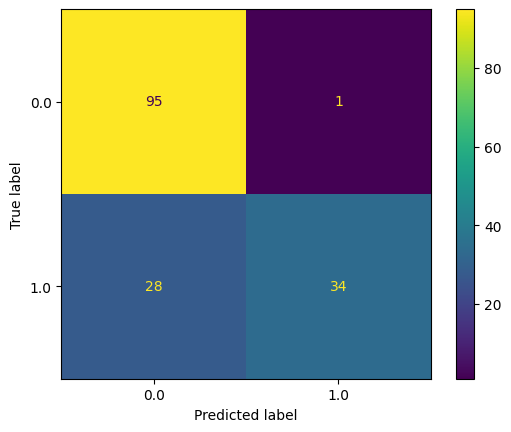

In [ ]:
# measure accuracy of length
length = headings.dropna(subset=['H_length', 'N_length'])
get_accuracy(length, 'H_length', 'N_length')

Accuracy: 0.9241
Precision: 0.5789
Recall: 0.7333
F1 Score: 0.6471


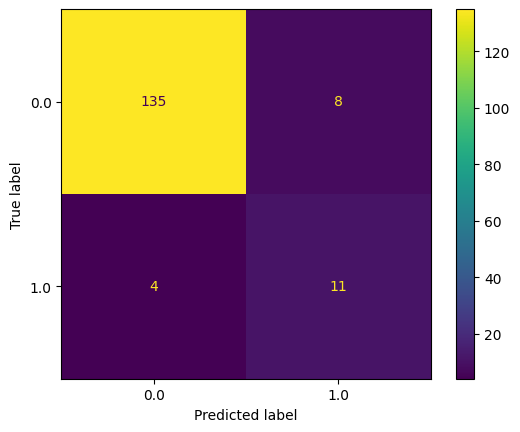

In [ ]:
# measure accuracy for language- grammar
grammar = headings.dropna(subset=['H_grammar', 'L_grammar'])
get_accuracy(grammar, 'H_grammar', 'L_grammar')

Accuracy: 0.9937
Precision: 0.8
Recall: 1.0
F1 Score: 0.8889


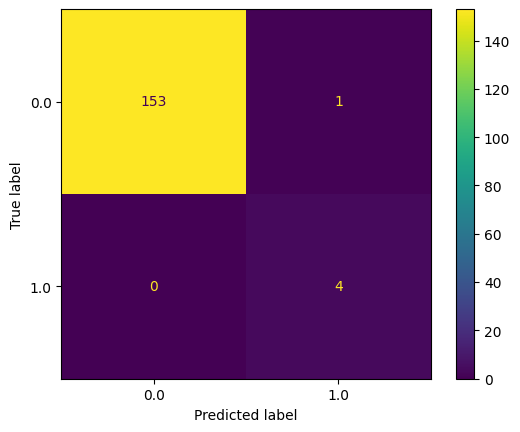

In [ ]:
# measure accuracy for language- passive
passive = headings.dropna(subset =['H_passive', 'N_passive'])
get_accuracy(passive, 'H_passive', 'N_passive')

Accuracy: 0.8102
Precision: 0.4
Recall: 0.4762
F1 Score: 0.4348


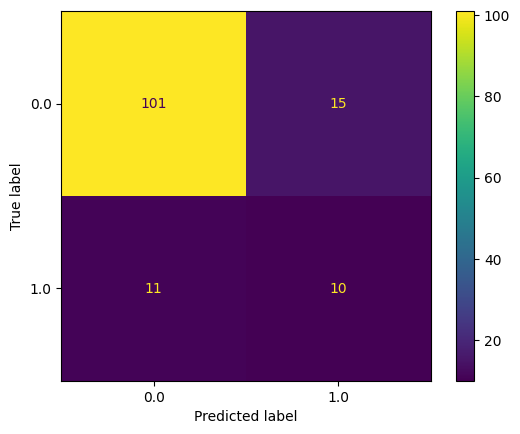

In [ ]:
# measure subheadings
subheadings = headings.dropna(subset = ['H_subheadings', 'L_subheadings'])
get_accuracy(subheadings, 'H_subheadings', 'L_subheadings')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.9714
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


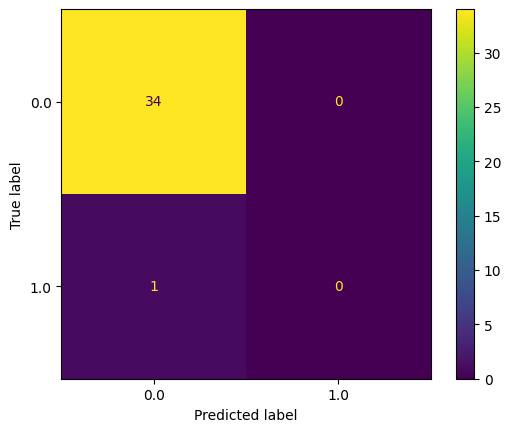

In [ ]:
# measure design
design = headings.dropna(subset = ['H_design', 'L_design'])
get_accuracy(design, 'H_design', 'L_design')

## Compile Scores

In [ ]:
# import updated datasets
content = pd.read_csv(link + 'header_body_test.csv')
headings = pd.read_csv(link + 'headings_test.csv')

In [ ]:
## three of the documents are not complete so i need to exclude them
# clean up content df
exclude_banks = ['barclays_c', 'natwest_c', 'santander_f']
filtered_content = content[~content['bank'].isin(exclude_banks)]
filtered_content.reset_index(drop=True, inplace=True)

In [ ]:
# clean up headings df
exclude_banks = ['barclays_c', 'natwest_c', 'santander_f']
filtered_headings = headings[~headings['bank'].isin(exclude_banks)]
filtered_headings.dropna(subset=['H_length'], inplace = True)
filtered_headings.reset_index(drop=True, inplace=True)

<ipython-input-37-0ad63c4343e1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_headings.dropna(subset=['H_length'], inplace = True)


In [ ]:
# merge datasets
merged_df = pd.merge(filtered_content, filtered_headings, on = ['header', 'bank'], how = 'right')

In [ ]:
# check for duplicate rows based on all columns
duplicate_rows = merged_df.duplicated()

# print the duplicate rows
print(merged_df[duplicate_rows])

           bank      header  \
14  santander_l  Put Simply   
15  santander_l  Put Simply   
16  santander_l  Put Simply   
17  santander_l  Put Simply   
18  santander_l  Put Simply   
19  santander_l  Put Simply   
21  santander_l  Put Simply   
22  santander_l  Put Simply   
23  santander_l  Put Simply   
24  santander_l  Put Simply   
25  santander_l  Put Simply   
26  santander_l  Put Simply   
28  santander_l  Put Simply   
29  santander_l  Put Simply   
30  santander_l  Put Simply   
31  santander_l  Put Simply   
32  santander_l  Put Simply   
33  santander_l  Put Simply   
35  santander_l  Put Simply   
36  santander_l  Put Simply   
37  santander_l  Put Simply   
38  santander_l  Put Simply   
39  santander_l  Put Simply   
40  santander_l  Put Simply   
42  santander_l  Put Simply   
43  santander_l  Put Simply   
44  santander_l  Put Simply   
45  santander_l  Put Simply   
46  santander_l  Put Simply   
47  santander_l  Put Simply   

                                      

In [ ]:
# drop duplicate rows based on all columns and keep the first occurrence
merged_df = merged_df.drop_duplicates(keep='first')

In [ ]:
# sum on the header level- exclude design
merged_df['element_sum_gen'] = merged_df[['N_length', 'L_grammar', 'N_passive', 'L_subheadings', 'L_relevance', 'N_keywords']].sum(axis=1)
merged_df['element_sum_label'] = merged_df[['H_length', 'H_grammar', 'H_passive', 'H_subheadings', 'H_relevance', 'H_keywords']].sum(axis=1)

In [ ]:
merged_df['count'] = 6

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97 entries, 0 to 126
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bank               97 non-null     object 
 1   header             97 non-null     object 
 2   body               64 non-null     object 
 3   H_relevance        64 non-null     float64
 4   H_keywords         73 non-null     float64
 5   N_keywords_notes   51 non-null     object 
 6   N_keywords         74 non-null     float64
 7   N_relevance        64 non-null     float64
 8   N_relevance_notes  64 non-null     float64
 9   L_relevance_notes  64 non-null     object 
 10  L_relevance        64 non-null     float64
 11  level              97 non-null     int64  
 12  H_length           97 non-null     float64
 13  H_grammar          97 non-null     float64
 14  H_passive          97 non-null     float64
 15  H_subheadings      87 non-null     float64
 16  H_design           97 non-null  

In [ ]:
# the document with the worst performing headers
merged_df[merged_df['element_sum_gen']== 4]['bank']

,bank
7,santander_l
8,santander_l
9,santander_l
10,santander_l
11,santander_l
12,santander_l


In [ ]:
# the document with the best performing headers
merged_df[merged_df['element_sum_gen']== 0]['bank']

,bank
3,lloyds_d
20,santander_l
41,santander_l
48,first_direct_l
49,first_direct_l
51,first_direct_l
53,first_direct_l
54,first_direct_l
57,first_direct_l
58,first_direct_l


In [ ]:
# examining
merged_df.groupby('bank')['element_sum_gen'].describe()

,count,mean,std,min,25%,50%,75%,max
bank,,,,,,,,
first_direct_l,17.0,0.411765,0.618347,0.0,0.00,0.0,1.00,2.0
hsbc_c,23.0,0.782609,0.671262,0.0,0.00,1.0,1.00,2.0
lloyds_c,7.0,2.000000,0.577350,1.0,2.00,2.0,2.00,3.0
lloyds_d,5.0,0.800000,0.447214,0.0,1.00,1.0,1.00,1.0
natwest_l,2.0,2.500000,0.707107,2.0,2.25,2.5,2.75,3.0
santander_a,30.0,1.200000,0.924755,0.0,1.00,1.0,1.75,3.0
santander_l,13.0,2.461538,1.664101,0.0,1.00,3.0,4.00,4.0


In [ ]:
# examining
merged_df.groupby('bank')['element_sum_label'].describe()

,count,mean,std,min,25%,50%,75%,max
bank,,,,,,,,
first_direct_l,17.0,0.294118,0.587868,0.0,0.0,0.0,0.0,2.0
hsbc_c,23.0,0.913043,0.668312,0.0,0.5,1.0,1.0,2.0
lloyds_c,7.0,1.714286,0.487950,1.0,1.5,2.0,2.0,2.0
lloyds_d,5.0,1.000000,1.000000,0.0,0.0,1.0,2.0,2.0
natwest_l,2.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
santander_a,30.0,1.233333,0.727932,0.0,1.0,1.0,2.0,3.0
santander_l,13.0,2.384615,1.609268,0.0,1.0,2.0,4.0,4.0


In [ ]:
# document level sum per documents
merged_df.groupby('bank')[['element_sum_gen', 'element_sum_label']].sum()

,element_sum_gen,element_sum_label
bank,,
first_direct_l,7.0,5.0
hsbc_c,18.0,21.0
lloyds_c,14.0,12.0
lloyds_d,4.0,5.0
natwest_l,5.0,2.0
santander_a,36.0,37.0
santander_l,32.0,31.0


In [ ]:
# error scores
merged_df.groupby('bank')['element_sum_gen'].sum() / merged_df.groupby('bank')['count'].sum()

,0
bank,
first_direct_l,0.068627
hsbc_c,0.130435
lloyds_c,0.333333
lloyds_d,0.133333
natwest_l,0.416667
santander_a,0.200000
santander_l,0.410256


In [ ]:
# correct score/ document score
1 - (merged_df.groupby('bank')['element_sum_gen'].sum() / merged_df.groupby('bank')['count'].sum())

,0
bank,
first_direct_l,0.931373
hsbc_c,0.869565
lloyds_c,0.666667
lloyds_d,0.866667
natwest_l,0.583333
santander_a,0.800000
santander_l,0.589744


In [ ]:
## actual scores
1 - (merged_df.groupby('bank')['element_sum_label'].sum() / merged_df.groupby('bank')['count'].sum())

,0
bank,
first_direct_l,0.950980
hsbc_c,0.847826
lloyds_c,0.714286
lloyds_d,0.833333
natwest_l,0.833333
santander_a,0.794444
santander_l,0.602564


In [ ]:
## from an element level
merged_df.groupby('bank')[['N_length', 'L_grammar', 'N_passive', 'L_subheadings', 'L_relevance', 'N_keywords']].sum()

,N_length,L_grammar,N_passive,L_subheadings,L_relevance,N_keywords
bank,,,,,,
first_direct_l,1.0,1.0,1.0,0.0,3.0,1.0
hsbc_c,2.0,6.0,1.0,2.0,6.0,1.0
lloyds_c,1.0,1.0,0.0,6.0,5.0,1.0
lloyds_d,0.0,0.0,0.0,1.0,1.0,2.0
natwest_l,0.0,1.0,0.0,0.0,2.0,2.0
santander_a,6.0,5.0,3.0,1.0,12.0,9.0
santander_l,9.0,3.0,0.0,6.0,7.0,7.0


In [ ]:
merged_df.groupby('bank')[['H_length', 'H_grammar', 'H_passive', 'H_subheadings', 'H_relevance', 'H_keywords']].sum()

,H_length,H_grammar,H_passive,H_subheadings,H_relevance,H_keywords
bank,,,,,,
first_direct_l,2.0,1.0,0.0,0.0,1.0,1.0
hsbc_c,9.0,5.0,1.0,2.0,0.0,4.0
lloyds_c,1.0,1.0,0.0,3.0,5.0,2.0
lloyds_d,0.0,0.0,0.0,0.0,2.0,3.0
natwest_l,0.0,0.0,0.0,0.0,0.0,2.0
santander_a,11.0,5.0,3.0,9.0,5.0,4.0
santander_l,9.0,3.0,0.0,6.0,6.0,7.0


In [ ]:
## proportions on element level- error rate
merged_df.groupby('bank')[['N_length', 'L_grammar', 'N_passive', 'L_subheadings', 'L_relevance', 'N_keywords']].sum() / merged_df.groupby('bank')[['N_length', 'L_grammar', 'N_passive', 'L_subheadings', 'L_relevance', 'N_keywords']].count()

,N_length,L_grammar,N_passive,L_subheadings,L_relevance,N_keywords
bank,,,,,,
first_direct_l,0.058824,0.058824,0.058824,0.000000,0.230769,0.076923
hsbc_c,0.086957,0.260870,0.043478,0.086957,0.750000,0.090909
lloyds_c,0.142857,0.142857,0.000000,0.857143,1.000000,0.166667
lloyds_d,0.000000,0.000000,0.000000,0.250000,0.200000,0.400000
natwest_l,0.000000,0.500000,0.000000,0.000000,1.000000,1.000000
santander_a,0.200000,0.166667,0.100000,0.033333,0.631579,0.360000
santander_l,0.692308,0.230769,0.000000,0.461538,0.583333,0.583333


In [ ]:
# correct rate
1 - (merged_df.groupby('bank')[['N_length', 'L_grammar', 'N_passive', 'L_subheadings', 'L_relevance', 'N_keywords']].sum() / merged_df.groupby('bank')[['N_length', 'L_grammar', 'N_passive', 'L_subheadings', 'L_relevance', 'N_keywords']].count())

,N_length,L_grammar,N_passive,L_subheadings,L_relevance,N_keywords
bank,,,,,,
first_direct_l,0.941176,0.941176,0.941176,1.000000,0.769231,0.923077
hsbc_c,0.913043,0.739130,0.956522,0.913043,0.250000,0.909091
lloyds_c,0.857143,0.857143,1.000000,0.142857,0.000000,0.833333
lloyds_d,1.000000,1.000000,1.000000,0.750000,0.800000,0.600000
natwest_l,1.000000,0.500000,1.000000,1.000000,0.000000,0.000000
santander_a,0.800000,0.833333,0.900000,0.966667,0.368421,0.640000
santander_l,0.307692,0.769231,1.000000,0.538462,0.416667,0.416667


In [ ]:
# actual correct rate
1 - (merged_df.groupby('bank')[['H_length', 'H_grammar', 'H_passive', 'H_subheadings', 'H_relevance', 'H_keywords']].sum() / merged_df.groupby('bank')[['H_length', 'H_grammar', 'H_passive', 'H_subheadings', 'H_relevance', 'H_keywords']].count())

,H_length,H_grammar,H_passive,H_subheadings,H_relevance,H_keywords
bank,,,,,,
first_direct_l,0.882353,0.941176,1.000000,1.000000,0.923077,0.923077
hsbc_c,0.608696,0.782609,0.956522,0.900000,1.000000,0.636364
lloyds_c,0.857143,0.857143,1.000000,0.571429,0.000000,0.666667
lloyds_d,1.000000,1.000000,1.000000,1.000000,0.600000,0.400000
natwest_l,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
santander_a,0.633333,0.833333,0.900000,0.678571,0.736842,0.833333
santander_l,0.307692,0.769231,1.000000,0.500000,0.500000,0.416667
